# Polynomial Regression
*See linear regression*

$$
\begin{align}
\mathbf{X} &\Longrightarrow \mathbf{X}_{poly}\\
\begin{bmatrix}
    (x^{(1)})\\
    (x^{(2)})\\
      \vdots \\
    (x^{(N-1)})\\
    (x^{(N)})
    \end{bmatrix}
    &\Longrightarrow
    \begin{bmatrix}
        (x^{(1)})^{d-1} & \dots & (x^{(1)})^{1}& (x^{(1)})^{0}\\
        (x^{(2)})^{d-1} & \dots & (x^{(2)})^{1}& (x^{(2)})^{0}\\
      \vdots & \ddots& \vdots & \vdots\\
       (x^{(N-1)})^{d-1} & \dots & (x^{(N-1)})^{1}& (x^{(N-1)})^{0}\\
      (x^{(N)})^{d-1} & \dots & (x^{(N)})^{1}& (x^{(N)})^{0}
    \end{bmatrix}
\end{align}
$$


```
polynomial_features = PolynomialFeatures(degree=d)
X_poly = polynomial_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from IPython.display import display, HTML

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import minmax_scale
from sklearn import metrics

In [3]:
df_bc = pd.read_csv("data/BTC-USD.csv",parse_dates=['Date']) 
df_eth = pd.read_csv("data/ETH-USD.csv",parse_dates=['Date'])
display(df_bc.head())
display(df_eth.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-06,278.000000,279.600006,274.279999,277.890015,277.890015,11919665
1,2015-08-07,277.890015,278.920013,257.420013,258.600006,258.600006,22308123
2,2015-08-08,258.600006,266.750000,258.559998,263.869995,263.869995,15154749
3,2015-08-09,263.869995,266.630005,260.519989,263.299988,263.299988,12873441
4,2015-08-10,263.299988,269.899994,261.440002,269.029999,269.029999,13681939


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-06,0.6747,3.0,0.6747,3.00,3.00,371
1,2015-08-07,3.0000,3.0,0.1500,1.20,1.20,1438
2,2015-08-08,1.2000,1.2,1.2000,1.20,1.20,0
3,2015-08-09,1.2000,1.2,1.2000,1.20,1.20,0
4,2015-08-10,1.2000,1.2,0.6504,0.99,0.99,7419


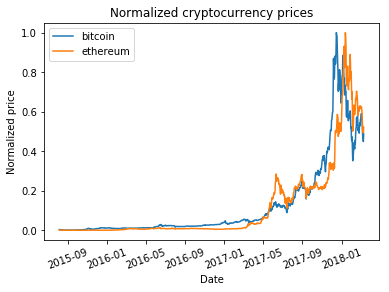

In [4]:
bitcoin = minmax_scale(df_bc['Close'])
ethereum = minmax_scale(df_eth['Close'])

plt.plot(df_bc.Date, bitcoin, label='bitcoin')
plt.plot(df_eth.Date, ethereum, label='ethereum')

plt.title('Normalized cryptocurrency prices')
plt.xlabel('Date')
plt.ylabel('Normalized price')
plt.xticks(rotation=20)
plt.legend()
plt.show()

Text(0.1, 0.5, '$(x^{(i)},y^{(i)})$')

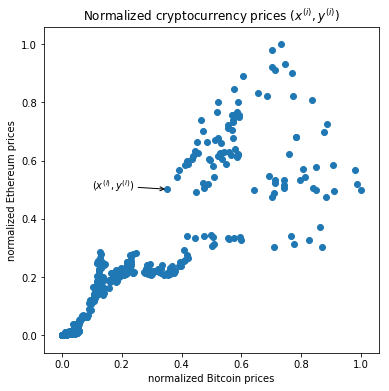

In [5]:
x=bitcoin.reshape(-1,1)
y=ethereum.reshape(-1,1)

plt.figure(figsize=(6, 6))
plt.scatter(x,y)
plt.title(r'Normalized cryptocurrency prices ($x^{(i)},y^{(i)}$)')
plt.xlabel('normalized Bitcoin prices')
plt.ylabel('normalized Ethereum prices')
plt.annotate('$(x^{(i)},y^{(i)})$', xy=(x[913], y[913]), xytext=(0.1, 0.5),
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            )

`np.polyfit(x,y,deg)`$d = degree$ 

Best fit $y = \beta_d x^d + \beta_{d-1} x^{d-1} + \dots + \beta_0 $ 

returns array of coefficients from highest to lowest power ($\beta_d, \dots \beta_0$)

In [6]:
def best_fit(x,y,degree):
    x,y = x.flatten(), y.flatten()
    guide = np.linspace(x.min(), x.max())
    par = np.polyfit(x,y,degree)
    result = np.zeros(len(guide))
    for i, coef in enumerate(par):
        result += coef*guide**(degree-i)
    return guide, result

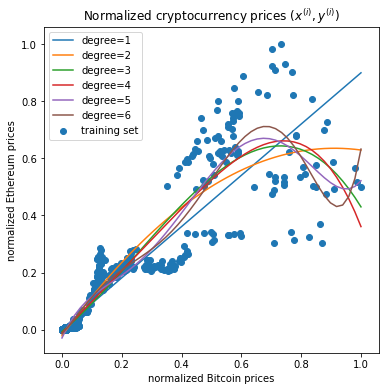

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(x,y, label="training set")
plt.title(r'Normalized cryptocurrency prices ($x^{(i)},y^{(i)}$)')
plt.xlabel('normalized Bitcoin prices')
plt.ylabel('normalized Ethereum prices')

for i, d in enumerate([1,2,3,4,5,6]):
    plt.plot(*best_fit(x,y,d), label=f'degree={d}')
    
plt.legend()

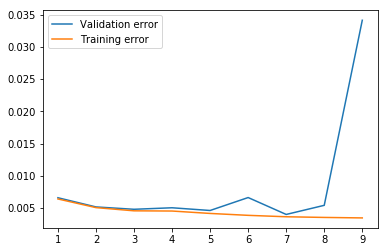

In [8]:
metric_ls = []

degrees = list(range(1, 10))
for d in degrees:
    polynomial_features= PolynomialFeatures(degree=d)
    X = polynomial_features.fit_transform(x)
    
    validation_error = []
    training_error = []
    for _ in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

        model = LinearRegression()
        model.fit(X_train, y_train)

        pred_test = model.predict(X_test)
        pred_train = model.predict(X_train)

        validation_error.append(metrics.mean_squared_error(y_test, pred_test))
        training_error.append(metrics.mean_squared_error(y_train, pred_train))

    metric_ls.append((np.mean(validation_error), np.mean(training_error)))

metric_ls = np.array(metric_ls)
plt.plot(degrees, metric_ls[:, 0], label='Validation error')
plt.plot(degrees, metric_ls[:, 1], label='Training error')
plt.legend()

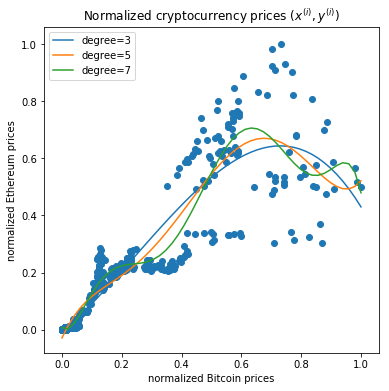

In [9]:
plt.figure(figsize=(6, 6))
plt.scatter(x,y)
plt.title(r'Normalized cryptocurrency prices ($x^{(i)},y^{(i)}$)')
plt.xlabel('normalized Bitcoin prices')
plt.ylabel('normalized Ethereum prices')

for d in [3,5,7]:
    plt.plot(*best_fit(x,y,d), label=f'degree={d}')
    
plt.legend()

In [10]:
def generate_polynomial_plot(x, par, **kwargs):
    guide = np.linspace(x.min(), x.max())
    result = np.zeros(len(guide))
    for i, coef in enumerate(par):
        result += coef*guide**i

    plt.plot(guide, result, **kwargs)

## Regularization

### l2 Regularization or Ridge Regression

In particular, we will use the squared norm $\| \mathbf{w} \|^{2}_{2} = w_{1}^{2}+\ldots+w_{d+1}^{2}$ of the weight vector for the regularization term to be added in the optimization problem above. 

This results in the following **regularized empirical risk minimization problem** 


\begin{equation}
\hat{\mathbf{w}}^{(\lambda)} = {\rm arg} \min\limits_{\mathbf{w} \in \mathbb{R}^{d_{\rm max}+1}} (1/N_{\rm train}) \sum_{i=2,4,\ldots,20} (y^{(i)} - \mathbf{w}^{T} \phi(x^{(i)}))^{2}+\lambda \| \mathbf{w} \|^{2}_{2}.
\end{equation}

The resulting weight vector $\hat{\mathbf{w}}^{(\lambda)}$ is then used to construct a predictor $\hat{h}^{(\lambda)}$ as 

\begin{equation} 
\hat{h}^{(\lambda)}(x) = \big( \hat{\mathbf{w}}^{(\lambda)}\big)^{T} \phi(x).
\end{equation} 

The constant $\lambda \geq 0$ is a tuning parameter and controls the "effective degree" of the resulting predictor $\hat{h}^{(\lambda)}(x)$.

In [11]:
from sklearn.linear_model import Ridge

In [12]:
d = 5
polynomial_features= PolynomialFeatures(degree=d)
X = polynomial_features.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

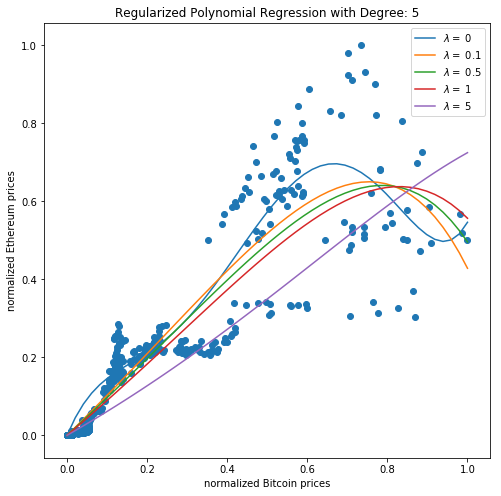

In [16]:
metric_ls = []

lambdas = [0, 0.1, 0.5, 1, 5]

plt.figure(figsize=(8, 8))
plt.scatter(x,y)
plt.title(f'Regularized Polynomial Regression with Degree: {d}')
plt.xlabel('normalized Bitcoin prices')
plt.ylabel('normalized Ethereum prices')

for la_ in lambdas:
    ridgereg = Ridge(alpha=la_)
    ridgereg.fit(X_train, y_train)
    y_pred_test = ridgereg.predict(X_test)
    y_pred_train = ridgereg.predict(X_train)
    
    validation_error = (metrics.mean_squared_error(y_test, y_pred_test))
    training_error = (metrics.mean_squared_error(y_train, y_pred_train))
    metric_ls.append((la_, training_error, validation_error))
    
    generate_polynomial_plot(x, ridgereg.coef_[0], label=r'$\lambda = $ %s' % la_)
plt.legend()

In [17]:
df = pd.DataFrame(metric_ls, columns=['Lambdas', 'Training errors', 'Validation errors'])
df

,Lambdas,Training errors,Validation errors
0,0.0,0.004430,0.004216
1,0.1,0.004865,0.004447
2,0.5,0.004996,0.004694
3,1.0,0.005290,0.005102
4,5.0,0.007974,0.008311


### Consequence of lambda value

- Using a large value of $\lambda$, results in a predictor $\hat{h}^{(\lambda)}(x)$ which resembles a polynomial of small degree (say, $d=2$). 
- In contrast, using a very small value of $\lambda$, will typically produce a predictor $\hat{h}^{(\lambda)}$ which resembles a high-degree polynomial (with $d \approx d_{\rm max}$).

In a certain sense, we replace (or approximate) the computation of the validation error of $h^{(\mathbf{w})}$  by adding the regularization term $\lambda \| \mathbf{w} \|^{2}_{2}$ to the training error in the optimization problem above. 

Indeed, the component $\lambda \| \mathbf{w} \|^{2}_{2}$ accounts for the anticipated increase in validation error due to the complexity ("wobbliness") of the predictor $h^{(\mathbf{w})}(x)= \mathbf{w}^{T} \phi(x)$. 

### Closed form

Similar to linear regression, we can derive a closed-form solution for the optimal weights in the **regularized empirical risk minimization problem** as

\begin{align}
\hat{\mathbf{w}}^{(\lambda)}& = \text{argmin}_{\mathbf{w} \in  \mathbb{R}^{d_{\rm max}+1}} \big[(1/N_{\rm train}) \|\mathbf{y} - \mathbf{X} \mathbf{w} \|^{2}_{2} + \lambda \| \mathbf{w} \|^{2}_{2}\big] \nonumber \\[3mm] 
& = (1/N_{\rm train})( (1/N_{\rm train}) \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^{T} \mathbf{y}.
\end{align} 

In [15]:
def regularizedFit(X, y,l=0):
    N=X.shape[0]
    w_opt = 1/N*np.dot(np.dot(np.linalg.inv(1/N*np.dot(np.transpose(X), X)+l*np.eye(X.shape[1])),np.transpose(X)), y)
    return w_opt